## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
    
### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

def get_unique_students(data, col_name):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point.get(col_name))
    return unique_students

enrollment_num_rows = len(enrollments)
    
enrollment_num_unique_students = len(get_unique_students(enrollments, 'account_key'))  # Replace this with your code

engagement_num_rows = len(daily_engagement)             # Replace this with your code

engagement_num_unique_students = len(get_unique_students(daily_engagement, 'acct'))  # Replace this with your code

submission_num_rows = len(project_submissions)             # Replace this with your code

submission_num_unique_students = len(get_unique_students(project_submissions, 'account_key'))  # Replace this with your code

print(enrollment_num_unique_students, engagement_num_unique_students)

1302 1237


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for engagement in daily_engagement:
    engagement['account_key'] = engagement.get('acct')
    del engagement['acct']

print(daily_engagement[0]['account_key'])


0


## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

unique_enrollments = get_unique_students(enrollments, 'account_key')
unique_engagements = get_unique_students(daily_engagement, 'account_key')

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagements:
        print(enrollment)
        break


{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
i = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagements and
            enrollment['join_date'] != enrollment['cancel_date']):
        print(enrollment)
        i += 1
print(i)

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}
3


## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if(account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
            
print(len(paid_students))


995


## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [72]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trail(data):
    paid_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students.keys():
            paid_data.append(data_point)
    return paid_data

paid_engagement_in_first_week = []

account_keys_of_paid_students = paid_students.keys()

paid_enrollments = remove_free_trail(non_udacity_enrollments)
paid_engagements = remove_free_trail(non_udacity_engagement)
paid_submissions = remove_free_trail(non_udacity_submissions)

for engagement in paid_engagements:
    account_key = engagement['account_key']
    engagement_date = engagement['utc_date']
    join_date = paid_students[account_key]
    
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)

print(len(paid_engagement_in_first_week))

6919


## Exploring Student Engagement

In [53]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
        
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')       

In [54]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
def sum_grouped_data(grouped_data, data_field):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total_sum  = 0
        for data_point in data_points:
            total_sum += data_point[data_field]
        summed_data[key] = total_sum
    return summed_data

total_minutes_by_account = sum_grouped_data(engagement_by_account, 'total_minutes_visited')

In [55]:
import numpy as np

# Summarize the data about minutes spent in the classroom
def summarize_data(data_dict):
    data = list(data_dict.values())
    print('Mean: ', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))

summarize_data(total_minutes_by_account)

Mean:  306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [56]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
student_with_max_total = None
max_total = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_total:
        max_total = total_minutes
        student_with_max_total = student

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_total:
        print(engagement_record)

{'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'lessons_completed': 4, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'lessons_completed': 2, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'lessons_completed': 1, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 14, 0, 0), 'num_courses_vi

## Lessons Completed in First Week

In [57]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
total_lessons_by_account = sum_grouped_data(engagement_by_account, 'lessons_completed')
    
summarize_data(total_lessons_by_account)

Mean:  1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [67]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
for engagement in paid_engagement_in_first_week:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0
        
total_num_of_visited_courses = sum_grouped_data(engagement_by_account, 'has_visited')
summarize_data(total_num_of_visited_courses)

Mean:  2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [77]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']


pass_subway_project = set()
for submission in paid_submissions:
    project = submission['lesson_key']
    rate = submission['assigned_rating']
    if (project in subway_project_lesson_keys and (rate == 'PASSED' or rate == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in pass_subway_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
        
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [87]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

total_minutes_pass = sum_grouped_data(passing_engagement_by_account, 'total_minutes_visited')
total_minutes_not_pass = sum_grouped_data(non_passing_engagement_by_account, 'total_minutes_visited')

passing_total_lessons = sum_grouped_data(passing_engagement_by_account, 'lessons_completed')
non_passing_total_lessons = sum_grouped_data(non_passing_engagement_by_account, 'lessons_completed')

passing_total_days = sum_grouped_data(passing_engagement_by_account, 'has_visited')
non_passing_total_days = sum_grouped_data(non_passing_engagement_by_account, 'has_visited')

print('Mean: ', np.mean(list(total_minutes_pass.values())))

Mean:  394.58604648350865


## Making Histograms

(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <BarContainer object of 10 artists>)

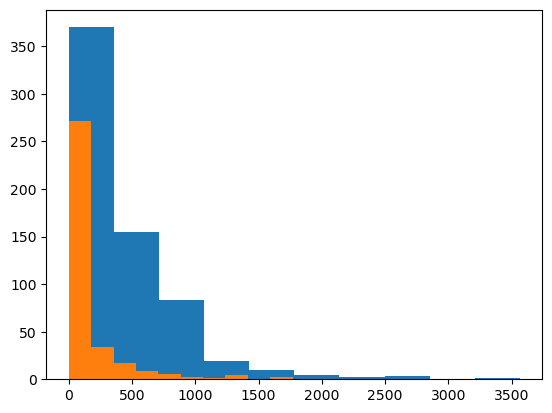

In [96]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

total_minutes_passed_data = list(total_minutes_pass.values())
total_minutes_not_passed_data = list(total_minutes_not_pass.values())

passing_total_lessons_data = list(passing_total_lessons.values())
non_passing_total_lessons_data = list(non_passing_total_lessons.values())

passing_total_days_data = list(passing_total_days.values())
non_passing_total_days_data = list(non_passing_total_days.values())

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(total_minutes_passed_data)
plt.hist(total_minutes_not_passed_data)
# plt.hist(passing_total_lessons_data)
# plt.hist(non_passing_total_lessons_data)
# plt.hist(passing_total_days_data)
# plt.hist(non_passing_total_days_data)

## Improving Plots and Sharing Findings

(array([285.,  33.,   8.,  12.,   2.,   2.,   4.,   2.]),
 array([   0.        ,  221.06534367,  442.13068733,  663.196031  ,
         884.26137467, 1105.32671833, 1326.392062  , 1547.45740567,
        1768.52274933]),
 <BarContainer object of 8 artists>)

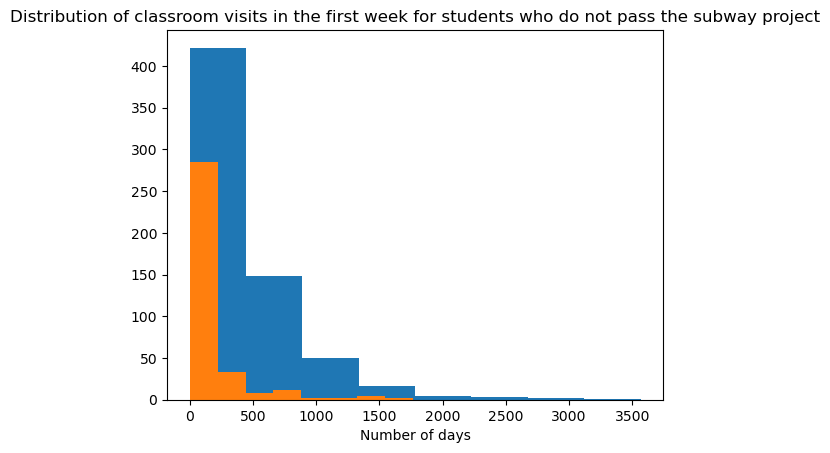

In [99]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns

plt.hist(total_minutes_passed_data, bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')
plt.hist(total_minutes_not_passed_data, bins=8)